In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df=pd.read_csv('data/book_genre.csv',index_col='index')
df.head()

,title,genre,summary
index,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
df.summary[0]

' Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur\'s side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him. Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday\'s Treasure Tower. Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House. Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed. When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope. Eventually, a buoy marking the pirate Elishar Feverfew\'s treasure floats toward him. As soon as Arthur opens it, his hand is marked with a bloody red colour. Arthur now has the Red Hand, by which Feverfew marks whoev

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4657 entries, 0 to 4656
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4657 non-null   object
 1   genre    4657 non-null   object
 2   summary  4657 non-null   object
dtypes: object(3)
memory usage: 274.6+ KB


In [6]:
df.genre.value_counts()

genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: count, dtype: int64

In [7]:
#Displaying "summary" before preprocessing begins.

print("Snapshot of books['summary']\n\n")
df['summary']

Snapshot of books['summary']




index
0        Drowned Wednesday is the first Trustee among ...
1        As the book opens, Jason awakens on a school ...
2        Cugel is easily persuaded by the merchant Fia...
3        The book opens with Herald-Mage Vanyel return...
4        Taran and Gurgi have returned to Caer Dallben...
                              ...                        
4652    Atticus O’Sullivan, last of the Druids, lives ...
4653    Charlie Bucket's wonderful adventure begins wh...
4654    "I live for the dream that my children will be...
4655    Rose loves Dimitri, Dimitri might love Tasha, ...
4656    The Prince of no value\nBrishen Khaskem, princ...
Name: summary, Length: 4657, dtype: object

In [8]:
def clean(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    
    return text

df.loc[:,'summary']=df.loc[:,'summary'].apply(lambda x: clean(x))

In [9]:
print("Snapshot of books['summary']\n\n")
df['summary']

Snapshot of books['summary']




index
0       drowned wednesday is the first trustee among t...
1       as the book opens jason awakens on a school bu...
2       cugel is easily persuaded by the merchant fian...
3       the book opens with herald mage vanyel returni...
4       taran and gurgi have returned to caer dallben ...
                              ...                        
4652    atticus o sullivan last of the druids lives pe...
4653    charlie buckets wonderful adventure begins whe...
4654    i live for the dream that my children will be ...
4655    rose loves dimitri dimitri might love tasha an...
4656    the prince of no value brishen khaskem prince ...
Name: summary, Length: 4657, dtype: object

Graph to visualize the words and frequency in book's summary.




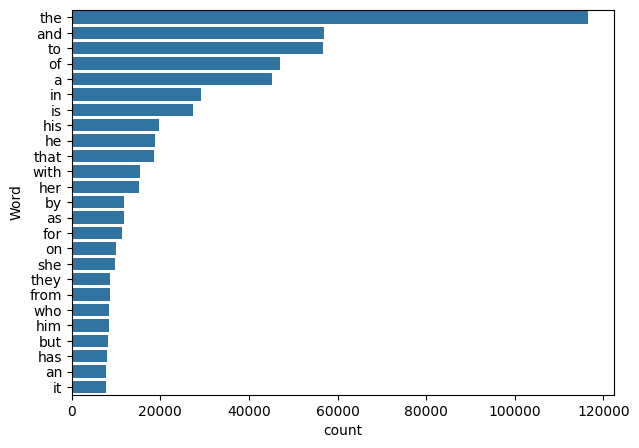

In [10]:
print("Graph to visualize the words and frequency in book's summary.\n\n")

def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 25 most frequent words 
freqwords(df['summary'], 25)

In [11]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['summary'] = df['summary'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
print("Snapshot of books['summary']\n\n")

df['summary']

Snapshot of books['summary']




index
0       drowned wednesday first trustee among morrow d...
1       book opens jason awakens school bus unable rem...
2       cugel easily persuaded merchant fianosther att...
3       book opens herald mage vanyel returning countr...
4       taran gurgi returned caer dallben following ev...
                              ...                        
4652    atticus sullivan last druids lives peacefully ...
4653    charlie buckets wonderful adventure begins fin...
4654    live dream children born free says like land f...
4655    rose loves dimitri dimitri might love tasha ma...
4656    prince value brishen khaskem prince kai lived ...
Name: summary, Length: 4657, dtype: object

In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


df['summary'] = df['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
print("Snapshot of books['summary']\n\n")

df['summary']

Snapshot of books['summary']




index
0       drowned wednesday first trustee among morrow d...
1       book open jason awakens school bus unable reme...
2       cugel easily persuaded merchant fianosther att...
3       book open herald mage vanyel returning country...
4       taran gurgi returned caer dallben following ev...
                              ...                        
4652    atticus sullivan last druid life peacefully ar...
4653    charlie bucket wonderful adventure begin find ...
4654    live dream child born free say like land fathe...
4655    rose love dimitri dimitri might love tasha mas...
4656    prince value brishen khaskem prince kai lived ...
Name: summary, Length: 4657, dtype: object

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


df['summary'] = df['summary'].apply(lambda x: stemming(x))

In [15]:
print("Snapshot of books['summary']\n\n")

df['summary']

Snapshot of books['summary']




index
0       drown wednesday first truste among morrow day ...
1       book open jason awaken school bu unabl rememb ...
2       cugel easili persuad merchant fianosth attempt...
3       book open herald mage vanyel return countri va...
4       taran gurgi return caer dallben follow event t...
                              ...                        
4652    atticu sullivan last druid life peac arizona r...
4653    charli bucket wonder adventur begin find one m...
4654    live dream child born free say like land fathe...
4655    rose love dimitri dimitri might love tasha mas...
4656    princ valu brishen khaskem princ kai live cont...
Name: summary, Length: 4657, dtype: object

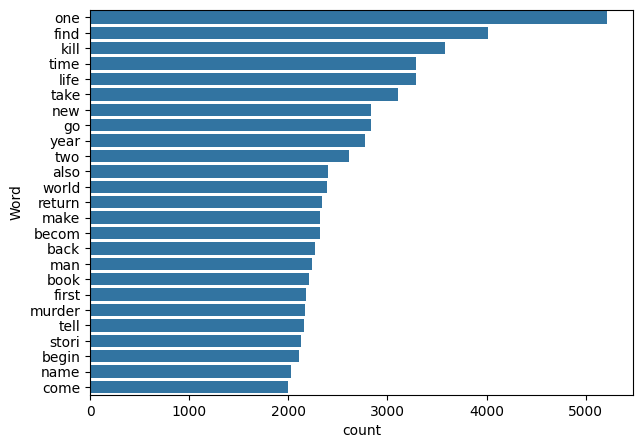

In [16]:
freqwords(df['summary'], 25)

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y=LE.fit_transform(df['genre'])

In [18]:
LE.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array(['crime', 'fantasy', 'history', 'horror', 'psychology', 'romance',
       'science', 'sports', 'thriller', 'travel'], dtype=object)

In [19]:
xtrain, xval, ytrain, yval = train_test_split(df['summary'], y, test_size=0.2, random_state=557) 

In [20]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))

xval_tfidf = tfidf_vectorizer.transform(xval.values.astype('U'))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
svc = svm.SVC(kernel='linear',probability = True)
svc_rbf = svm.SVC(kernel = 'rbf', gamma = 1,probability = True)

#fit
clf.fit(xtrain_tfidf, ytrain)
svc.fit(xtrain_tfidf,ytrain)
svc_rbf.fit(xtrain_tfidf,ytrain)

#predict
y_pred_lr = clf.predict(xval_tfidf)
svlinearpred=svc.predict(xval_tfidf)
svrbfpred=svc_rbf.predict(xval_tfidf)


predictors = {
    "Logistic Regression":y_pred_lr,
    "Support Vector Classifier with Linear Kernel":svlinearpred, 
    "Support Vector Classifier with rbf Kernel":svrbfpred
}

In [22]:
#Calculating the accuracy.
print("Accuracy Scores with 80-20 split")
for model, pred in predictors.items():
    print(f"{model}:{accuracy_score(yval,pred)}")

Accuracy Scores with 80-20 split
Logistic Regression:0.674892703862661
Support Vector Classifier with Linear Kernel:0.7017167381974249
Support Vector Classifier with rbf Kernel:0.6555793991416309


In [30]:
def infertag(q):
    q = clean(q)
    q = removestopwords(q)
    q = lematizing(q)
    q = stemming(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = svc.predict(q_vec)
    q_pred_prob = svc.predict_proba(q_vec)
    
    # Getting the predicted genre and probabilities
    predicted_genre = LE.inverse_transform(q_pred)[0]
    predicted_probabilities = q_pred_prob[0]  # Extracting the array of probabilities

    return predicted_genre, predicted_probabilities


for i in range(50): 
    k = xval.sample(1).index[0]
    print("\nBook: ", df['title'][k])

    pred_genre, pred_prob = infertag(xval[k])
    
    print("\nPredicted genre: ", pred_genre)
    print("\nActual genre: ", df['genre'][k])
    
    # Getting all genres and their corresponding probabilities
    all_genres = LE.classes_  # This gets all possible genres

    # Sort only the probabilities (keeping the genres aligned with them)
    sorted_probabilities = sorted(zip(pred_prob, all_genres), reverse=True)
    
    # Print the genres with their sorted probabilities
    print("\nPredicted Probabilities:")
    for prob, genre in sorted_probabilities:
        print(f"{genre}: {prob:.4f}")

    print("\n-------------------------------")



Book:  The Human Factor

Predicted genre:  thriller

Actual genre:  thriller

Predicted Probabilities:
psychology: 0.3099
thriller: 0.2497
history: 0.1648
science: 0.1418
crime: 0.0575
horror: 0.0273
fantasy: 0.0198
travel: 0.0122
romance: 0.0120
sports: 0.0048

-------------------------------

Book:  Run Away

Predicted genre:  thriller

Actual genre:  thriller

Predicted Probabilities:
thriller: 0.8095
crime: 0.0644
horror: 0.0507
fantasy: 0.0318
romance: 0.0277
science: 0.0076
sports: 0.0040
psychology: 0.0018
history: 0.0014
travel: 0.0011

-------------------------------

Book:  Tales of a Female Nomad: Living at Large in the World

Predicted genre:  fantasy

Actual genre:  travel

Predicted Probabilities:
fantasy: 0.6387
travel: 0.0948
science: 0.0758
horror: 0.0648
history: 0.0505
psychology: 0.0332
thriller: 0.0300
crime: 0.0058
romance: 0.0051
sports: 0.0013

-------------------------------

Book:  Genus Homo

Predicted genre:  science

Actual genre:  science

Predicted Proba